In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [2]:
X = 6 * np.random.rand(200,1)-3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200,1) 

Text(0, 0.5, 'y')

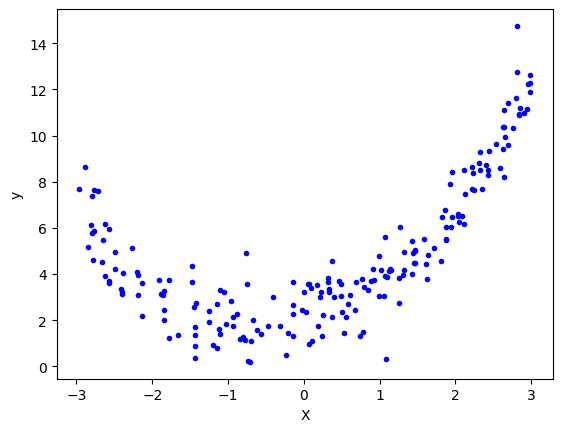

In [5]:
plt.plot(X,y,'b.')
plt.xlabel('X')
plt.ylabel('y')

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [10]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pre = lr.predict(X_test)

In [13]:
r2_score(y_test,y_pre)

0.44035626758614077

Text(0, 0.5, 'y')

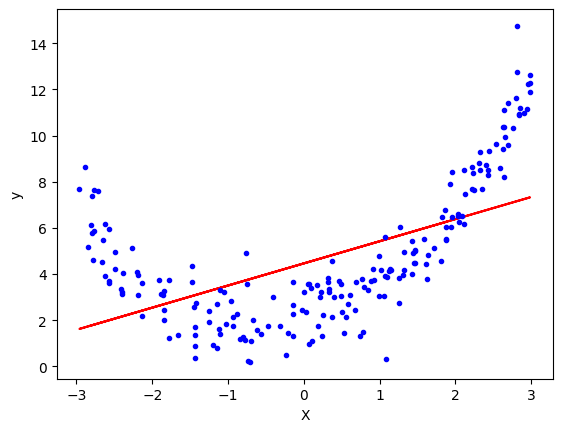

In [14]:
plt.plot(X_train,lr.predict(X_train),color = 'red')
plt.plot(X,y,'b.')
plt.xlabel('X')
plt.ylabel('y')

In [16]:
# Applying Polynomial Linear Regression
poly = PolynomialFeatures(degree = 2, include_bias = True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.fit_transform(X_test)

In [18]:
print(X_train_trans[0])
print(X_test_trans[0])

[ 1.         -2.81155027  7.90481493]
[1.         0.76734956 0.58882534]


In [19]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)
y_predict = lr.predict(X_test_trans)

In [20]:
r2_score(y_test,y_predict)

0.9175196485283587

In [29]:
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

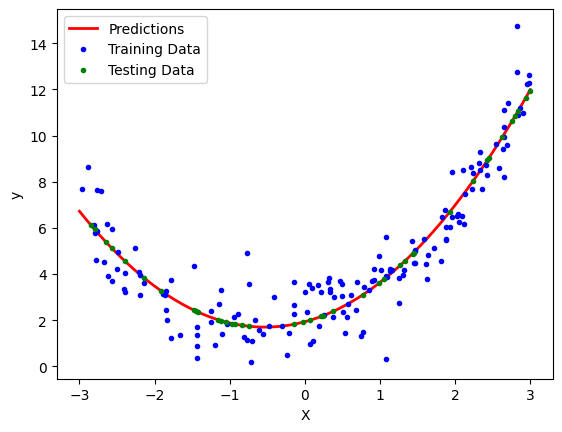

In [32]:
plt.plot(X_new, y_new, 'r-', linewidth = 2, label = 'Predictions')
plt.plot(X_train, y_train, 'b.', label = 'Training Data')
plt.plot(X_test, y_predict, 'g.', label = 'Testing Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [33]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.87945869 0.82537357]]
[1.93070903]


# 3D polynomial

In [36]:
x = 6 * np.random.rand(100,1) -3
y = 6 * np.random.rand(100,1) -3

z = x**2 + y**2+ 0.2*x*y+ 6*x + 7*y + 2 + np.random.randn(100,1)

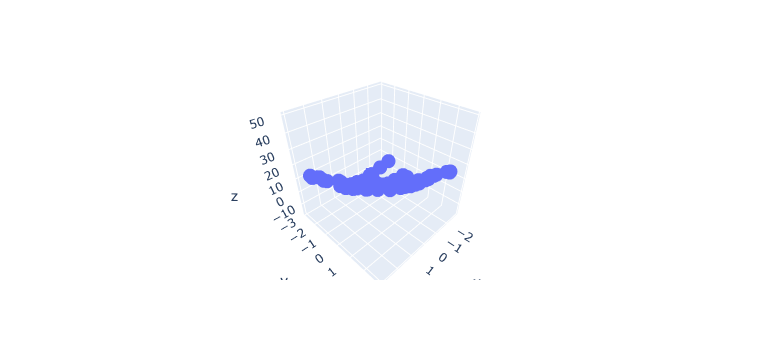

In [37]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x = x.ravel(), y=y.ravel(),z=z.ravel())
fig.show()

In [48]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2), z)

LinearRegression()

In [49]:
x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)

In [52]:
x_grid, y_grid = np.meshgrid(x_input,y_input)
final =  np.vstack((x_grid.ravel().reshape(1,100),y_grid.ravel().reshape(1,100))).T

In [53]:
z_final = lr.predict(final).reshape(10,10)

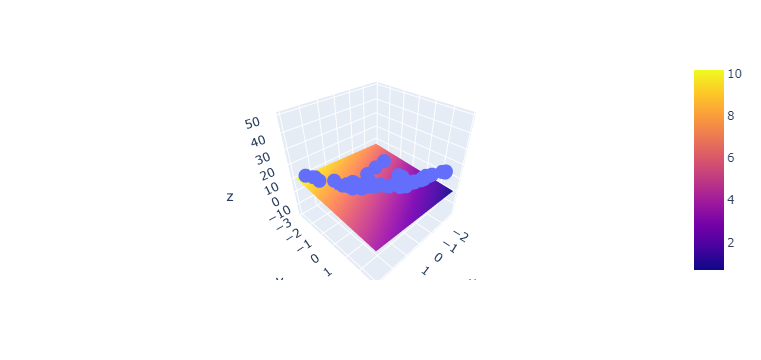

In [54]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()